In [ ]:
# Для таблично заданной функции путем решения нормальной системы Метода Наименьших Квадратов найти приближающие 
# многочлены 1-й, 2-й, 3-й степеней. Построить их графики
# x = [-3.0, -2.0, -1.0, 0.0, 1.0, 2.0]
# y = [0.04979, 0.13534, 0.36788, 1.0, 2.7183, 7.3891]

In [ ]:
# построить F1(x) = a0 + a1*x; F2(x) = a0 + a1*x + a2*(x**2);  F3(x) = a0 + a1*x + a2*(x**2) + a3*(x**3);
# для F1 имеем n = 4; m = 1; f0 = 1; f1 = x
# для F2 имеем n = 4; m = 2; f0 = 1; f1 = x; f2 = x**2
# для F3 имеем n = 4; m = 3; f0 = 1; f1 = x; f2 = x**2; f3 = x**3
# для определения коэффициентов составим систему уравнений

Введите степень m многочлена
4
6.0 -3.0 19.0 -27.0 115.0 | 11.660409999999999
-3.0 19.0 -27.0 115.0 -243.0 | 16.70857
19.0 -27.0 115.0 -243.0 859.0 | 33.63205
-27.0 115.0 -243.0 859.0 -2187.0 | 59.03617
115.0 -243.0 859.0 -2187.0 7075.0 | 127.51021

1.0 -2.1130434782608694 7.469565217391304 -19.017391304347825 61.52173913043478 | 1.1087844347826088
0.0 1.0 -0.7130852340936376 5.9627851140456185 -9.075630252100842 | 1.5354044447779112
-0.0 -0.0 1.0 -2.275862068965516 10.862068965517233 | 0.43440043103448267
-0.0 -0.0 -0.0 1.0 -2.8686868686868623 | 0.11975223484848539
-0.0 -0.0 -0.0 -0.0 1.0 | 0.033619374999999896

многочлен выглядит так:
F(x)= 0.9704083333333315  +  0.9516163888888887 * x^ 1  +  0.5612560416666678 * x^ 2  +  0.21619569444444448 * x^ 3  +  0.033619374999999896 * x^ 4 

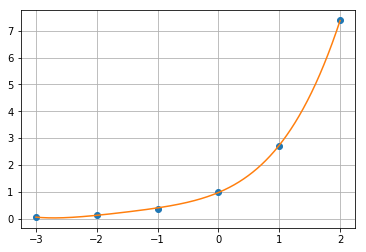

In [4]:
import matplotlib.pyplot as plt
import numpy as np 


def sortmatrix (a, t):
    row = a[t]
    a = sorted(a, key=lambda row : abs(row[0]), reverse = True)
    return a


def gaus(a, m):
    for t in range(len(a[0])-1):
        a = sortmatrix(a, t) # сортируем
        d = a[t][t]
        for k in range(len(a[0])):
            a[t][k] /= d
        for k in range(t+1, len(a)):
            p = a[k][t]/a[t][t]
            for i in range(len(a[0])):
                a[k][i] -= p * a[t][i]
    return a 


def gramma(m, x):
    n = len(x)
    g = [[0 for i in range(m+1)] for j in range(m)]
    for l in range(m):
        for k in range(m):
            for i in range(n):
                g[l][k] += (x[i]**(l))*(x[i]**(k))
        for j in range(n):
            g[l][m] += (x[j]**(l))*y[j]
    return g

def ans(g):
    m = len(g[0])-1
    a = [0 for i in range(m)]
    for i in range(m-1, -1, -1):
        for j in range(m-1, i, -1):
            g[i][m] -= a[j]*g[i][j]            
        a[i] = g[i][m]/g[i][i]
    return a
    

def OLS(x, y, m):
    # находим матрицу грамма и правую часть по формулам
    g = gramma(m, x)
    for i in range(m):
        for j in range(m):
            print(g[i][j], end=' ')
        print("|", g[i][m])
    print()
    # методом гаусса решаем систему
    g = gaus(g, m)
    for i in range(m):
        for j in range(m):
            print(g[i][j], end=' ')
        print("|", g[i][m])
    print()
    a = ans(g)
    #print(a)
    return a

def show(a):
    print("многочлен выглядит так:")
    print("F(x)=", end=" ")
    for i in range(m+1):
        if i == 0:
            print(a[i], end=" ")
        else:
            print(" + ", a[i],"* x^", i, end=" ")
            
def function(a, x):
    y = 0
    for i in range(len(a)):
        y += a[i] * (x**i)
    return y

def plotshow(x, y, a):
    f_x = np.arange(x[0]+0.001, x[len(x)-1], 0.001) 
    f_y = [function(a, i) for i in f_x] 
    plt.plot(x, y,'o',f_x,f_y) 
    plt.grid(True)
    plt.show()
    
x = [-3.0, -2.0, -1.0, 0.0, 1.0, 2.0]
y = [0.04979, 0.13534, 0.36788, 1.0, 2.7183, 7.3891]
print("Введите степень m многочлена")
m = int(input())
a = OLS(x, y, m+1) # метод наименьших квадратов
show(a)
plotshow(x, y, a)
    
